## Part 1：读取文件，并把内容分别写到两个list里（一个list对应问题集，另一个list对应答案集）

In [1]:

def read_corpus():
    """
    读取给定的语料库，并把问题列表和答案列表分别写入到 qlist, alist 里面。 在此过程中，不用对字符换做任何的处理（这部分需要在 Part 2.3里处理）
    qlist = ["问题1"， “问题2”， “问题3” ....]
    alist = ["答案1", "答案2", "答案3" ....]
    务必要让每一个问题和答案对应起来（下标位置一致）
    """
    import json
    
    path = "./data/train-v2.0.json"
    with open(path,'r',encoding="utf8") as f:
        all_data = json.loads(f.read())
    data = all_data["data"]
    qlist = []
    alist = []
    
    for dic in data: # json 格式为字典嵌套列表，一级一级分解即可
        paragraphs = dic["paragraphs"]
        for para in paragraphs:
            qas = para["qas"]
            for qa in qas:
                if qa["answers"] != []:
                    answer = qa["answers"][0]["text"]
                    alist.append(answer)
                    question = qa["question"]
                    qlist.append(question)
    assert len(qlist) == len(alist)  # 确保长度一样
    return qlist, alist

## Part 2： 理解数据（可视化分析/统计信息）
对数据的理解是任何AI工作的第一步，需要充分对手上的数据有个更直观的理解。

总共 873167 个单词
总共 45246 个不同的单词
[61008, 37007, 33994, 21807, 18451, 17067, 16201, 15635, 13241, 10778, 8025, 8024, 7229, 7209, 5498, 5457, 5368, 4441, 4430, 4331, 4296, 4189, 4137, 4109, 3711, 3665, 3660, 3369, 3241, 3145, 3016, 2972, 2941, 2709, 2636, 2284, 2276, 2165, 2119, 2103, 1924, 1703, 1644, 1561, 1485, 1476, 1420, 1337, 1310, 1301, 1294, 1291, 1283, 1264, 1250, 1248, 1227, 1224, 1191, 1183, 1166, 1158, 1095, 1081, 1062, 1042, 1015, 1008, 982, 974, 930, 921, 919, 913, 911, 910, 895, 883, 876, 872, 855, 847, 840, 824, 819, 810, 808, 805, 787, 778, 775, 760, 744, 722, 717, 713, 702, 690, 683, 660]
['the', 'What', 'of', 'in', 'to', 'was', 'is', 'did', 'what', 'a', 'How', 'Who', 'and', 'for', 'many', 'are', 'When', 'that', 'were', 'does', 'In', 'on', 'with', 'Which', 'from', 'by', 'as', 'year', 'Where', 'The', 'be', 'have', 'do', 'first', 'name', 'which', 'an', 'at', 'type', 'used', 'has', 'most', 'can', 'people', 'their', 'other', 'how', 'his', 'it', 'called', 'two', 'when', 'its', 

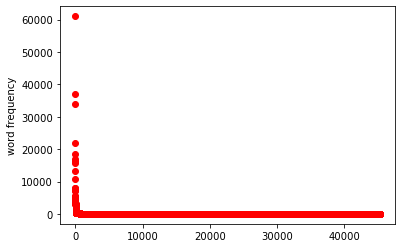

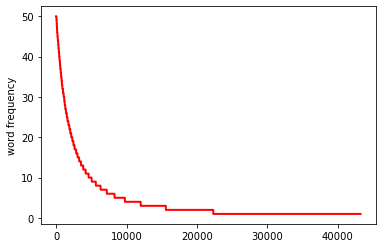

In [2]:
# TODO: 统计一下在qlist 总共出现了多少个单词？ 总共出现了多少个不同的单词？
#       这里需要做简单的分词，对于英文我们根据空格来分词即可，其他过滤暂不考虑（只需分词）
import string
import re
 
# 去标点符号，分词，得到词-词频字典
def segmentWords(lst):
    total = 0
    word_dict = {}
    for line in lst:
        pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
        sentence = pattern.sub("", line) # 去除标点
        words = sentence.split()
        for word in words:
            #对word出现的频率进行统计，当word不在words时，返回值是0，当word在words中时，返回+1，以此进行累计计数
            word_dict[word] = word_dict.get(word, 0) + 1 
            total += 1
    return total,word_dict
 
qlist, alist = read_corpus() # 获取词库
word_total,q_dict = segmentWords(qlist)
total_diff_word = len(q_dict.keys())
print("总共 %d 个单词" % word_total)
print("总共 %d 个不同的单词" % total_diff_word)
# TODO: 统计一下qlist中每个单词出现的频率，并把这些频率排一下序，然后画成plot. 比如总共出现了总共7个不同单词，而且每个单词出现的频率为 4, 5,10,2, 1, 1,1
#       把频率排序之后就可以得到(从大到小) 10, 5, 4, 2, 1, 1, 1. 然后把这7个数plot即可（从大到小）
#       需要使用matplotlib里的plot函数。y轴是词频
import matplotlib.pyplot as plt
 
word_sorted = sorted(q_dict.items(),key=lambda k:k[1],reverse=True) #按词频排序
word_freq = []
word_list = []
for line in word_sorted:
    word_list.append(line[0]) # 单词列表
    word_freq.append(line[1]) # 单词频率
 
print(word_freq[:100])
print(word_list[:100])
x = range(total_diff_word)
plt.plot(x,word_freq,'ro')
plt.ylabel("word frequency")
plt.show()
 
temp = [n for n in word_freq if n <=50]
plt.plot(range(len(temp)),temp, color='r',linestyle='-',linewidth=2)
plt.ylabel("word frequency")
plt.show()


In [3]:
# TODO: 在qlist和alist里出现次数最多的TOP 10单词分别是什么？
a_total, a_dic = segmentWords(alist)
words_sorted = sorted(a_dic.items(),key=lambda k:k[1],reverse=True)
word_freq2 = []
word_list2 = []
for line in words_sorted:
    word_list2.append(line[0])
    word_freq2.append(line[1])
print("top 10 word of qlist are: ", word_list[:10])
print("top 10 word of alist are: ", word_list2[:10])


top 10 word of qlist are:  ['the', 'What', 'of', 'in', 'to', 'was', 'is', 'did', 'what', 'a']
top 10 word of alist are:  ['the', 'of', 'and', 'to', 'a', 'in', 'The', 'or', 'for', 'million']


# Part 3 ：文本预处理
次部分需要尝试做文本的处理。在这里我们面对的是英文文本，所以任何对英文适合的技术都可以考虑进来。

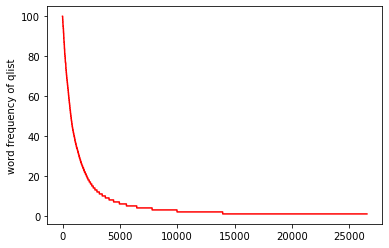

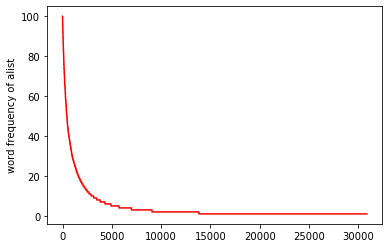

the length of new qlist is  86821
the length of new alist is  86821


In [4]:
# TODO: 对于qlist, alist做文本预处理操作。 可以考虑以下几种操作：
#       1. 停用词过滤 （去网上搜一下 "english stop words list"，会出现很多包含停用词库的网页）   
#       2. 转换成lower_case： 这是一个基本的操作   
#       3. 去掉一些无用的符号： 比如连续的感叹号！！！， 或者一些奇怪的单词。
#       4. 去掉出现频率很低的词：比如出现次数少于10,20....
#       5. 对于数字的处理： 分词完只有有些单词可能就是数字比如44，415，把所有这些数字都看成是一个单词，这个新的单词我们可以定义为 "#number"
#       6. stemming（利用porter stemming): 因为是英文，所以stemming也是可以做的工作
#       7. 其他（如果有的话）
#       请注意，不一定要按照上面的顺序来处理，具体处理的顺序思考一下，然后选择一个合理的顺序
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
 
stemmer = PorterStemmer()
 
stopwords = set(stopwords.words('english'))
 
# 预处理：去标点符号，去停用词，stemming,将数字转换为'#number'表示
def preprocessing(lst):
    new_list=[]
    word_dic = {}
    for line in lst:
        pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
        sentence = pattern.sub("", line) # 去除标点
        sentence = sentence.lower() # 转化为小写
        words = sentence.split()
        temp = []
        for word in words:
            if word not in stopwords: # 去除停用词
                word = "#number" if word.isdigit() else word # 数字用#number表示
                w = stemmer.stem(word) # stem操作
                word_dic[w] = word_dic.get(w, 0) + 1
                temp.append(w)
        new_list.append(temp)
    return word_dic,new_list
 
# 画出100分为类的词频统计图
def drawgraph(dic, name):
    freq = list(dic.values())
    freq.sort(reverse=True)
    temp = [n for n in freq if n <=100]
    plt.plot(range(len(temp)),temp,'r-')
    plt.ylabel(name)
    plt.show()

# 过滤掉词频低于2，大于10000的词
def filterword(dic, lst, bottom,top):
    temp = []
    for k,v in dic.items():
        if v >= bottom and v <= top:
            temp.append(k)
    new_list = []
    for line in lst:
        words = [w for w in line if w in temp]
        new_list.append(' '.join(words))
                
    return new_list
 
q_dict,q_list = preprocessing(qlist) # 获取处理后字典和列表，分别为每个词的个数，所有的单词
drawgraph(q_dict,"word frequency of qlist")
 
a_dict,a_list = preprocessing(alist)
drawgraph(a_dict, "word frequency of alist")
 
new_qlist = filterword(q_dict, q_list, 2, 10000) # 过滤掉词频低于2，大于10000的词
new_alist = filterword(a_dict, a_list, 2, 10000)
print("the length of new qlist is ",len(new_qlist))
print("the length of new alist is ",len(new_alist))

## Part 4：文本表示
当我们做完关键的预处理过程之后，就需要把每一个文本转换成向量。

In [5]:

# TODO: 把qlist中的每一个问题字符串转换成tf-idf向量, 转换之后的结果存储在X矩阵里。 X的大小是： N* D的矩阵。 这里N是问题的个数（样本个数），
#       D是字典库的大小。 
 
from sklearn.feature_extraction.text import TfidfVectorizer
 
vectorizer =  TfidfVectorizer()# 定一个tf-idf的vectorizer
 
X = vectorizer.fit_transform(new_qlist)  # 结果存放在X矩阵
 
# TODO: 矩阵X有什么特点？ 计算一下它的稀疏度
x_mat = X.toarray()
# n = len(x_mat)
# m = len(x_mat[0])
# t = 0
# for i in range(n):
#     for j in range(m):
#         if x_mat[i][j] != 0:
#             t += 1
# sparsity = t / (n*m)
# print (sparsity)  # 打印出稀疏度


## Part 5 ：对于用户的输入问题，找到相似度最高的TOP5问题，并把5个潜在的答案做返回

####  cosine_similarity函数说明
返回的结果是$\frac{xy^{T}}{\left \| x \right \|\left \| y \right \|}$

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
 
def top5results(input_q):
    """
    给定用户输入的问题 input_q, 返回最有可能的TOP 5问题。这里面需要做到以下几点：
    1. 对于用户的输入 input_q 首先做一系列的预处理，然后再转换成tf-idf向量（利用上面的vectorizer)
    2. 计算跟每个库里的问题之间的相似度
    3. 找出相似度最高的top5问题的答案
    """
    # 问题预处理
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    sentence = pattern.sub("", input_q)
    sentence = sentence.lower()
    words = sentence.split()
    result = []
    for word in words:
        if word not in stopwords:
            word = "#number" if word.isdigit() else word
            w = stemmer.stem(word)
            result.append(w)
    
    #计算相似度
    input_seg = ' '.join(result)
    input_vec = vectorizer.transform([input_seg])
    res = cosine_similarity(input_vec, X)[0]
    
    #得到top 5的索引
    score_idx = dict((i,v) for i,v in enumerate(res)) # 将每个值添加一个索引，并写进一个字典
    score_sorted = sorted(score_idx.items(), key=lambda k:k[1],reverse=True) # 将字典按键排序
    idx = [idx[0] for idx in score_sorted] # 取出键（即索引）
    top_idxs = idx[:5]  # top_idxs存放相似度最高的（存在qlist里的）问题的下表 
    print(top_idxs)
    
    result = [alist[i] for i in top_idxs]
    return result  # 返回相似度最高的问题对应的答案，作为TOP5答案

In [7]:
# TODO: 编写几个测试用例，并输出结果
print (top5results("when did Beyonce start becoming popular"))
print (top5results("what languge does the word of 'symbiosis' come from"))
 

[0, 39267, 60835, 23136, 62423]
['in the late 1990s', 'Particularly since the 1950s, pro wrestling events have frequently been responsible for sellout crowds at large arenas', 'mandolin-based guitar programs', 'early DJs creating music in their own homes', 'Iwasaki Yatarō']
[7786, 27470, 41967, 7844, 8154]
['Greek', '1570s', 'living together', 'the evolution of all eukaryotes', 'Persian and Sanskrit']


# part 6 ：利用倒排表的优化
上面的算法，一个最大的缺点是每一个用户问题都需要跟库里的所有的问题都计算相似度。假设我们库里的问题非常多，这将是效率非常低的方法。 这里面一个方案是通过倒排表的方式，先从库里面找到跟当前的输入类似的问题描述。然后针对于这些candidates问题再做余弦相似度的计算。这样会节省大量的时间。

In [8]:
# 分数（10）

# TODO: 基于倒排表的优化。在这里，我们可以定义一个类似于hash_map, 比如 inverted_index = {}， 然后存放包含每一个关键词的文档出现在了什么位置，
#       也就是，通过关键词的搜索首先来判断包含这些关键词的文档（比如出现至少一个），然后对于candidates问题做相似度比较。
# 
inverted_idx = {}  # 定一个一个简单的倒排表
for i in range(len(new_qlist)):
    for word in new_qlist[i].split():
        if word not in inverted_idx:
            inverted_idx[word] = [i]
        else:
            inverted_idx[word].append(i)
for k in inverted_idx:
    inverted_idx[k] = sorted(inverted_idx[k]) # 文档排序  

In [9]:
import numpy as np
def top5results_invidx(input_q):
    """
    给定用户输入的问题 input_q, 返回最有可能的TOP 5问题。这里面需要做到以下几点：
    1. 利用倒排表来筛选 candidate
    2. 对于用户的输入 input_q 首先做一系列的预处理，然后再转换成tf-idf向量（利用上面的vectorizer)
    3. 计算跟每个库里的问题之间的相似度
    4. 找出相似度最高的top5问题的答案
    """
    # 问题预处理
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    sentence = pattern.sub("", input_q) # 去除标点
    sentence = sentence.lower() # 转为小写
    words = sentence.split()
    result = []
    for word in words:
        if word not in stopwords:
            word = "#number" if word.isdigit() else word # 数字转为 #number
            w = stemmer.stem(word) # steming
            result.append(w)
    # 根据倒排表筛选出候选问题索引
    candidate = []
    for word in result:
        if word in inverted_idx:
            candidate.append(inverted_idx[word])
    candidate_idx = set()
    for doc in candidate:
        candidate_idx.update(doc) # 候选问题索引
#     print(len(candidate_idx))
    
    #计算相似度
    input_seg = ' '.join(result)
    input_vec = vectorizer.transform([input_seg])
    
    # 与每个候选问题计算相似度
    res = []
    for i in candidate_idx:
        score = cosine_similarity(input_vec,X[i])[0]
        res.append((i,score[0]))  # [[1, d1],[2, d2]……]
    res_sorted = sorted(res,key=lambda k:k[1],reverse=True) # key用于表示用第几个元素进行排序
    #print(res_sorted)
    
    # 根据索引检索top 5答案
    answers = []
    i = 0
    for (idx,score) in res_sorted:
        if i < 5:
            answer = alist[idx]
            answers.append(answer)
        i += 1
    
    return answers

In [10]:
# TODO: 编写几个测试用例，并输出结果
print (top5results_invidx("when did Beyonce start becoming popular"))
print (top5results_invidx("what languge does the word of 'symbiosis' come from"))

['in the late 1990s', 'Particularly since the 1950s, pro wrestling events have frequently been responsible for sellout crowds at large arenas', 'mandolin-based guitar programs', 'early DJs creating music in their own homes', 'KRS-One']
['Greek', '1570s', 'living together', 'the evolution of all eukaryotes', 'Persian and Sanskrit']


In [11]:
alist[0]

'in the late 1990s'

# Part 7: 基于词向量的文本表示
上面所用到的方法论是基于词袋模型（bag-of-words model）。这样的方法论有两个主要的问题：1. 无法计算词语之间的相似度  2. 稀疏度很高。 在2.7里面我们
讲采用词向量作为文本的表示。词向量方面需要下载： https://nlp.stanford.edu/projects/glove/ （请下载glove.6B.zip），并使用d=100的词向量（100维）。

In [12]:
# 分数（10）
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
 
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

def ReadTxtName(rootdir): 
    words_in_vector = [] 
    words_vectors = []
    with open(rootdir, 'r',encoding='UTF-8') as file_to_read: # UTF-8-sig 是为了避免开头出现\ufeff 
        while True:
            line = file_to_read.readline()
            if not line: # 读取所有的内容           
                break
            line_split = line.split()
            words_in_vector.append(line_split[0])
            words_vectors.append(line_split[1:])
    return words_in_vector,words_vectors

rootdir = 'D:\\数据分析软件安装包\\glove.6B.100d.txt' 
words_in_vector,emb = ReadTxtName(rootdir) # 读取词向量表

In [163]:
from itertools import chain
from collections import Counter
# # TODO
# 读取每一个单词的嵌入。这个是 D*H的矩阵，这里的D是词典库的大小， H是词向量的大小。 这里面我们给定的每个单词的词向量，那句子向量怎么表达？
# 其中，最简单的方式 句子向量 = 词向量的平均（出现在问句里的）， 如果给定的词没有出现在词典库里，则忽略掉这个词。
def caculate_sentence_vector(input_sentence, words_in_vector, emb):
    word_vec_index = [] # 存储句子的词向量索引
    for word in input_sentence:
        index = words_in_vector.index(word) if word in words_in_vector else None
        if index:
            word_vec_index.append(index)
#     print(word_vec_index)
    if len(word_vec_index) == 0:
        return False,False
    sentence_vect = np.zeros_like(np.array(list(map(float, emb[0])))) # 存储句子的向量表示
    n = 0
    for i in word_vec_index:
        n += 1
        sentence_vect += np.array(list(map(float, emb[i])))
    
    return True,(sentence_vect/n).reshape(1, -1)

def top5results_emb(input_q):
    """
    给定用户输入的问题 input_q, 返回最有可能的TOP 5问题。这里面需要做到以下几点：
    1. 利用倒排表来筛选 candidate
    2. 对于用户的输入 input_q，转换成句子向量
    3. 计算跟每个库里的问题之间的相似度
    4. 找出相似度最高的top5问题的答案
    """
    # 问题预处理
    pattern = re.compile('[{}]'.format(re.escape(string.punctuation)))
    sentence = pattern.sub("", input_q) # 去除标点
    sentence = sentence.lower() # 转为小写
    words = sentence.split()
    new_words = [] # 存储预处理后的句子
    for word in words:
        if word not in stopwords:
            word = "#number" if word.isdigit() else word # 数字转为 #number
            w = stemmer.stem(word) # steming
            new_words.append(w)
            
    # 根据倒排表筛选出候选问题索引
    candidate = []
    count_word = []
    for word in new_words:
        if word in inverted_idx: # 倒排表
            candidate.append(inverted_idx[word])  
    
    candidate_1d = list(chain.from_iterable(candidate)) # 数据扁平化
    count_candidate = Counter(candidate_1d) # 统计词频
    common = count_candidate.most_common(10) # 取出数量最多的前N个,如果未指定则返回所有
    candidate_idx = set()
    for (idx, count) in common:
        if count >= 2: # 有两个单词出现则列为候选问题
            candidate_idx.add(idx)
    if len(candidate_idx) == 0:
        return False,False
#     print(candidate_idx)
    _,input_sentence_vector = caculate_sentence_vector(new_words, words_in_vector, emb)
    score = []
    score_idx = []
    for idx in candidate_idx:
        flag,candidate_vect = caculate_sentence_vector(new_qlist[idx].split(), words_in_vector, emb) 
        if flag:
            score.append(cosine_similarity(input_sentence_vector,candidate_vect)[0])
            score_idx.append(idx)
    return score_idx,score
score_idx,score = top5results_emb("When did Beyonce start becoming popular?") 
if score_idx == False:
    print('抱歉，没找到答案')
else:
    print(alist[score_idx[np.argmax(score)]])

in the late 1990s


In [150]:
qlist[0:5]

['When did Beyonce start becoming popular?',
 'What areas did Beyonce compete in when she was growing up?',
 "When did Beyonce leave Destiny's Child and become a solo singer?",
 'In what city and state did Beyonce  grow up? ',
 'In which decade did Beyonce become famous?']

In [151]:
alist[0:5]

['in the late 1990s',
 'singing and dancing',
 '2003',
 'Houston, Texas',
 'late 1990s']

In [ ]:

# 过滤掉词频低于2，大于10000的词
def filterword(dic, lst, bottom,top):
    temp = []
    for k,v in dic.items():
        if v >= bottom and v <= top:
            temp.append(k)
    new_list = []
    for line in lst:
        words = [w for w in line if w in temp]
